In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")
sys.path.append("../../Env/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload
import copy
import pandas as pd

Welcome to JupyROOT 6.24/06


23:24:18 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=816739;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=883932;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=301879;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=321284;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

23:24:21 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=1514;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=76988;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

23:24:22 INFO      Starting 3ML!                                                                     ]8;id=793782;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=262442;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=206586;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=43751;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=166669;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=558366;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=752460;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=800269;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

23:24:28 WARNING   Multinest minimizer not available                                           ]8;id=159875;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=189282;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=807206;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=531126;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

23:24:29 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=850641;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=695132;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=183757;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=611203;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

Load sub from Myspeedup: 100%|██████████| 37/37 [00:01<00:00, 36.35it/s]   

Yourlib init successfully!!!


In [11]:
# obsSpectrum = "../../data/lc_data/GRB221009A/glg_cspec_n6_bn221009553_v00.pha"
obsSpectrum = "./glg_ctime_n6_bn221009553_v00.pha"
bakSpectrum = "../../data/lc_data/GRB221009A/glg_cspec_n6_bn221009553_v00.pha"
rspFile = "../../data/lc_data/GRB221009A/glg_cspec_n6_bn221009553_v03.rsp"
rspFile = "./glg_ctime_n6_bn221009553_v03.rsp"
NaI6 = OGIPLike( "NaI6", observation=obsSpectrum, response=rspFile, spectrum_number=2) #, background=bakSpectrum, 

23:30:39 INFO      Auto-probed noise models:                                                    ]8;id=568576;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=409816;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=868468;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=606994;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: None                                                           ]8;id=378247;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=987652;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

In [12]:
NaI6.set_active_measurements( "10.0-30.0", "40.0-950.0" )

23:30:45 INFO      Range 10.0-30.0 translates to channels 0-2                                  ]8;id=999092;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=725103;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Range 40.0-950.0 translates to channels 2-6                                 ]8;id=551139;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=954453;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

In [13]:
NaI6.display()

,0
pha file,glg_ctime_n6_bn221009553_v00.pha
bak file,None
n. channels,8
total rate,1041.973205
exposure,0.255285
is poisson,True
response,glg_ctime_n6_bn221009553_v03.rsp


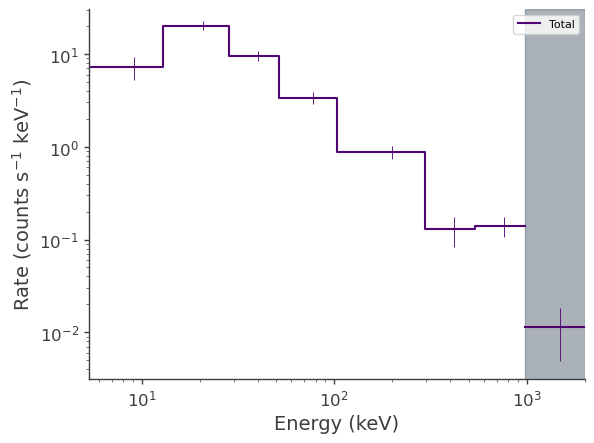

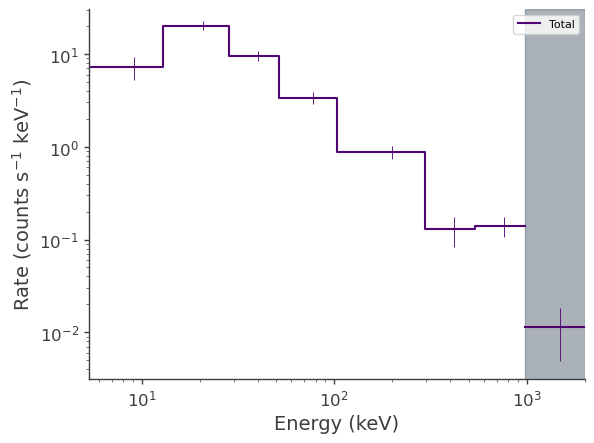

In [14]:
%matplotlib inline
NaI6.view_count_spectrum()

In [17]:
data_list = DataList( NaI6 )
powerlaw = Powerlaw()
GRB = PointSource( "GRB221009A", 288.3, 19.7, spectral_shape=powerlaw)
model = Model( GRB )
jl = JointLikelihood( model, data_list, verbose=False )
jl.set_minimizer('ROOT')
res = jl.fit()

23:22:54 INFO      set the minimizer to minuit                                             ]8;id=242411;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=597815;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1045\1045]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=250775;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=277340;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1062\1062]8;;\